# Project: Loan default prediction model
By: odubajo abdul qoyyum
## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#assessing">Data Assessing</a></li>  
    <li><a href="#analysis">EDA</a></li>
    <li><a href="#conclusion">data preparation and model building

___
# INTRODUCTION

For this project we will be exploring publicly available loan data. Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.


Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

### Import all packages and set plots to be embedded inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### DATA ASSESSING

In [2]:
df_loans = pd.read_csv('loan_data.csv')

In [3]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


> no missing values in any column

In [4]:
df_loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [31]:
#taking a look at 10 random rows

df_loans.sample(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
5202,1,debt_consolidation,0.1183,298.21,10.491274,11.67,727,1980.000000,3973,44.6,1,0,0,0
2769,1,debt_consolidation,0.1379,238.53,10.203592,21.91,697,3180.000000,7494,94.9,0,0,0,0
5898,1,home_improvement,0.0774,140.49,11.192720,17.85,757,8465.041667,20362,19.6,0,1,0,0
7067,1,debt_consolidation,0.1136,658.23,11.170435,8.25,717,12692.041670,30987,48.4,1,4,0,0
3211,1,home_improvement,0.1635,254.37,11.314475,8.97,662,6329.958333,10085,33.5,3,0,0,0
7059,1,debt_consolidation,0.1148,65.94,10.268131,14.25,702,3180.041667,179,59.7,2,0,0,0
6290,1,debt_consolidation,0.1322,507.01,11.200951,1.66,692,3602.000000,17109,81.5,2,0,0,0
3250,1,debt_consolidation,0.1411,444.98,11.066638,19.03,687,4020.000000,17902,94.7,0,0,0,0
427,1,credit_card,0.1078,81.59,11.580584,16.37,682,9960.041667,16164,80.0,1,0,0,0
1873,1,debt_consolidation,0.1126,315.49,11.097410,18.31,722,4110.041667,39660,46.5,0,0,0,0


###  Exploratory Data Analysis

Text(0.5, 0, 'FICO')

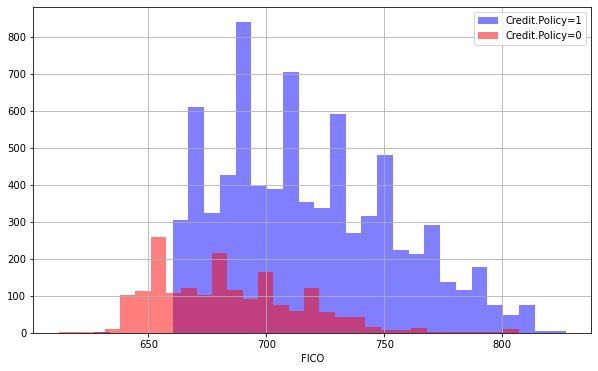

In [32]:
# creating histogram for FICO distribution of both credit policies

plt.figure(figsize=(10,6))
df_loans[df_loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
df_loans[df_loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

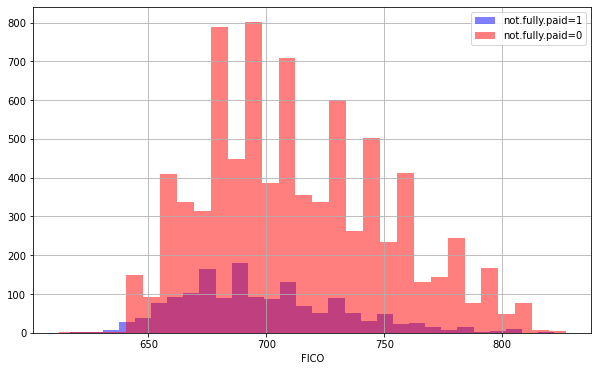

In [33]:
# creating histogram for FICO distribution of not fully paid column

plt.figure(figsize=(10,6))
df_loans[df_loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
df_loans[df_loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

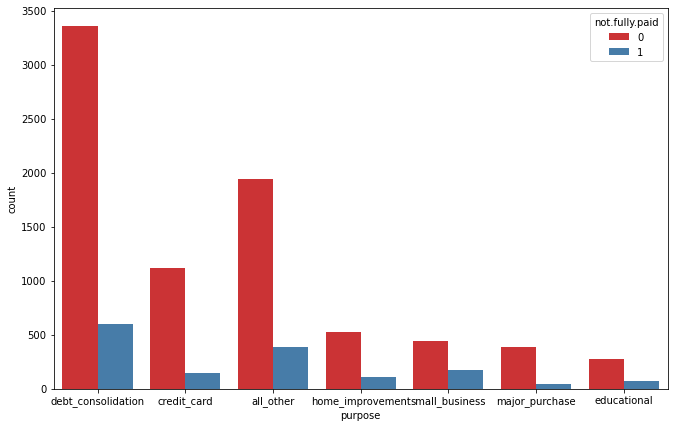

In [35]:
#creating a countplot for purpose which loan outcome by purpose which it was taken

plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df_loans,palette='Set1')

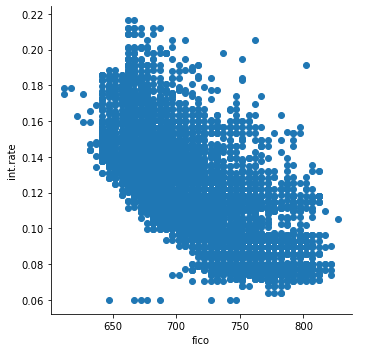

In [38]:
# creating a scatterplot of fico vs inerest rate

g = sns.FacetGrid(data = df_loans, height = 5)
g.map(plt.scatter,'fico', 'int.rate');
g.add_legend()

### Data preparation

In [10]:
#getting dummy variables for the loan purpose

dummies= pd.get_dummies(df_loans.purpose)

In [11]:
df_loans_final= pd.concat([df_loans,dummies],axis='columns')

### Model building using decision tree

##### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

In [13]:
X = df_loans_final.drop(['not.fully.paid','purpose'], axis=1)
y = df_loans_final['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=88,stratify=y)

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

##### randomizing the data

In [15]:
skf = StratifiedKFold(5, shuffle=True, random_state=1)

In [16]:
cross_val_score(tree, X_train,y_train, cv= skf, scoring= 'accuracy')

array([0.73676361, 0.73079791, 0.73228934, 0.7360179 , 0.74253731])

##### training the model

In [17]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
predictions = tree.predict(X_test)

### model evaluation

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(confusion_matrix(y_test,predictions))

[[2043  371]
 [ 343  117]]


In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2414
           1       0.24      0.25      0.25       460

    accuracy                           0.75      2874
   macro avg       0.55      0.55      0.55      2874
weighted avg       0.76      0.75      0.75      2874



### Model building using random forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc = RandomForestClassifier(n_estimators=600)

In [24]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [25]:
predictions = rfc.predict(X_test)

### model evaluation

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2414
           1       0.53      0.02      0.04       460

    accuracy                           0.84      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.79      0.84      0.77      2874



In [28]:
print(confusion_matrix(y_test,predictions))

[[2406    8]
 [ 451    9]]
